## Import modules

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

sns.set_theme()
plt.rcParams.update({'font.size': 22})

## Joint train and test datasets available at UCI

In [88]:
col_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "target",
]
df_train = pd.read_csv("data/adult_data.csv", sep=",", header=0, names=col_names)
df_test = pd.read_csv("data/adult_data_test.csv", sep=",", header=0, names=col_names)
df = pd.concat([df_train, df_test], axis=0, ignore_index=True, verify_integrity=True)
df.to_csv("./data/us_census.csv", index=False)

## Read data and summarise each column

In [2]:
df = pd.read_csv("./data/us_census.csv", na_values=" ?")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       46041 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education_num   48840 non-null  int64 
 5   marital_status  48840 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital_gain    48840 non-null  int64 
 11  capital_loss    48840 non-null  int64 
 12  hours_per_week  48840 non-null  int64 
 13  native_country  47983 non-null  object
 14  target          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
## Let's see what values are in each column
for column in df.columns:
    print(df[column].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
28    1280
37    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
24    1206
39    1205
25    1194
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
50     866
18     862
49     847
48     845
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, dtype: int64
 Private             33905
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432


In [8]:
df[["education", "education_num"]].value_counts()

education      education_num
 HS-grad       9                15784
 Some-college  10               10878
 Bachelors     13                8024
 Masters       14                2657
 Assoc-voc     11                2061
 11th          7                 1811
 Assoc-acdm    12                1601
 10th          6                 1389
 7th-8th       4                  955
 Prof-school   15                 834
 9th           5                  756
 12th          8                  657
 Doctorate     16                 594
 5th-6th       3                  509
 1st-4th       2                  247
 Preschool     1                   83
dtype: int64

In [91]:
## Check out the number of missing values
df.isna().sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
target               0
dtype: int64

## Make some value replacements

In [3]:
## string type entries have a blank space in front of them
col_list = ["workclass", "education","marital_status",
            "occupation", "relationship", "race", "sex",
            "native_country", "target"]
df[col_list] = df[col_list].applymap(lambda string: string.strip() if string is not np.nan else string)

## Specify generical "Other" in race
df["race"] = df["race"].replace("Other", "other_race")

## Replace strings in target column by ones and zeroes
rep_dict = {
    "<=50K": 0,
    "<=50K.": 0,
    ">50K": 1,
    ">50K.": 1
}
df["target"].replace(to_replace=rep_dict, value=None, inplace=True)

## Drop columns which should not be used

In [4]:
## "education-num" is a categorical variable equivalent to
## "education".
##
## "fnlwgt" means "final-weight" and represents the number of
## people in the US population that each record represents, due
## to stratified sampling. Therefore, it should not be used when
## trying to predict individual income.

df.drop(labels=["fnlwgt"], axis=1, inplace=True)

## Reorder categorical data

In [5]:
## Reorder education
df["education"] = pd.Categorical(df["education"],
                                 categories=["Preschool", "1st-4th",
                                             "5th-6th", "7th-8th",
                                             "9th", "10th", "11th",
                                             "12th", "HS-grad",
                                             "Some-college",
                                             "Assoc-voc", "Assoc-acdm",
                                             "Bachelors", "Masters",
                                             "Prof-school", "Doctorate"],
                                 ordered=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48840 non-null  int64   
 1   workclass       46041 non-null  object  
 2   education       48840 non-null  category
 3   education_num   48840 non-null  int64   
 4   marital_status  48840 non-null  object  
 5   occupation      46031 non-null  object  
 6   relationship    48840 non-null  object  
 7   race            48840 non-null  object  
 8   sex             48840 non-null  object  
 9   capital_gain    48840 non-null  int64   
 10  capital_loss    48840 non-null  int64   
 11  hours_per_week  48840 non-null  int64   
 12  native_country  47983 non-null  object  
 13  target          48840 non-null  int64   
dtypes: category(1), int64(6), object(7)
memory usage: 4.9+ MB


## Get dummies

In [6]:
df_dummy = pd.get_dummies(df, prefix=["wrk_cls","","occup","","","",
                                      "from",],
                          prefix_sep=["_", "", "_", "", "", "", "_"],
                          columns=["workclass", "marital_status",
                                   "occupation", "relationship",
                                   "race", "sex", "native_country"])
df_dummy_no_ctry = pd.get_dummies(df, prefix=["wrk_cls","","occup","","",""],
                          prefix_sep=["_", "", "_", "", "", ""],
                          columns=["workclass", "marital_status",
                                   "occupation", "relationship",
                                   "race", "sex"])

## Visualizations

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       46041 non-null  object
 2   education       48840 non-null  object
 3   marital_status  48840 non-null  object
 4   occupation      46031 non-null  object
 5   relationship    48840 non-null  object
 6   race            48840 non-null  object
 7   sex             48840 non-null  object
 8   capital_gain    48840 non-null  int64 
 9   capital_loss    48840 non-null  int64 
 10  hours_per_week  48840 non-null  int64 
 11  native_country  47983 non-null  object
 12  target          48840 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [20]:
print(df.corr().drop(["hours_per_week", "target"], axis=1).to_latex())
print(df.corr()[["hours_per_week", "target"]].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &       age &  education\_num &  capital\_gain &  capital\_loss \\
\midrule
age            &  1.000000 &       0.030917 &      0.077227 &      0.056940 \\
education\_num  &  0.030917 &       1.000000 &      0.125143 &      0.080974 \\
capital\_gain   &  0.077227 &       0.125143 &      1.000000 &     -0.031441 \\
capital\_loss   &  0.056940 &       0.080974 &     -0.031441 &      1.000000 \\
hours\_per\_week &  0.071558 &       0.143693 &      0.082157 &      0.054467 \\
target         &  0.230362 &       0.332624 &      0.223015 &      0.147551 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &  hours\_per\_week &    target \\
\midrule
age            &        0.071558 &  0.230362 \\
education\_num  &        0.143693 &  0.332624 \\
capital\_gain   &        0.082157 &  0.223015 \\
capital\_loss   &        0.054467 &  0.147551 \\
hours\_per\_week &        1.000000 &  0.227687 \\
target         &        0.227687 &  1.000000 \\
\bottomrule
\

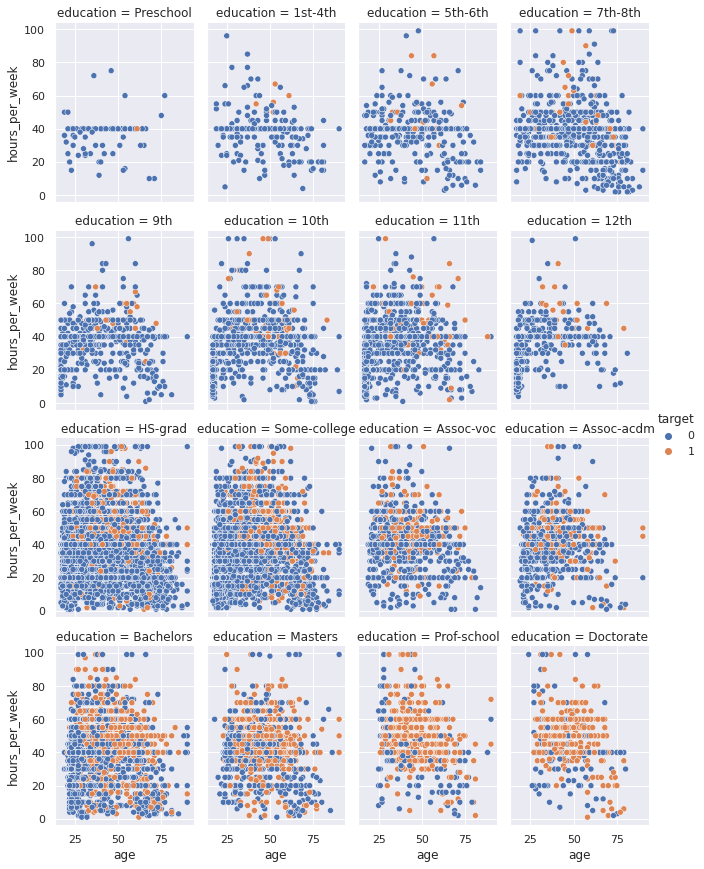

In [42]:
fig = sns.relplot(x="age", y="hours_per_week", hue="target",
                  # style="target",
                  col="education", col_wrap=4,
                  height=3, aspect=.75, kind="scatter", data=df)
fig.savefig("./report/fig/hours_age_by_ed.pdf")

In [ ]:
sns.relplot(x="age", y="hours_per_week", hue="target",
            # style="target",
            col="education", col_wrap=4,
            height=3, aspect=.75, kind="scatter", data=df)

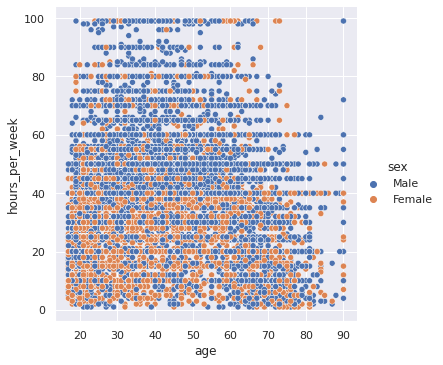

In [94]:
sns.relplot(x="age", y="hours_per_week", kind="scatter", hue="sex", data=df)

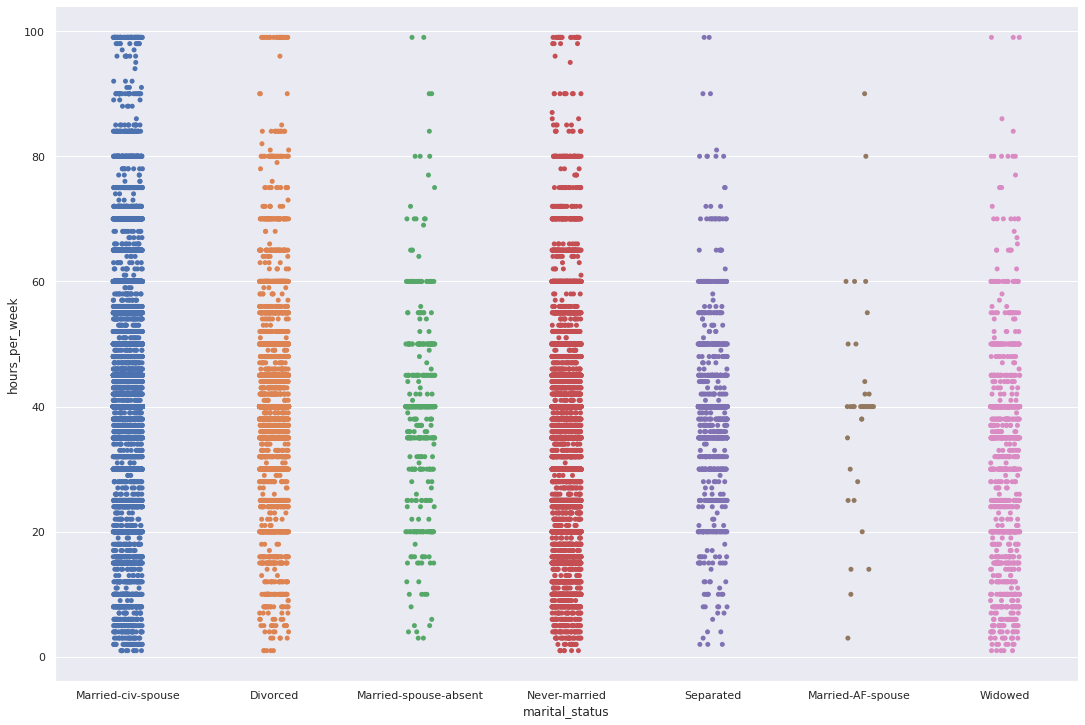

In [27]:
sns.catplot(x="marital_status", y="hours_per_week", data=df,
            height=10, aspect=1.5)

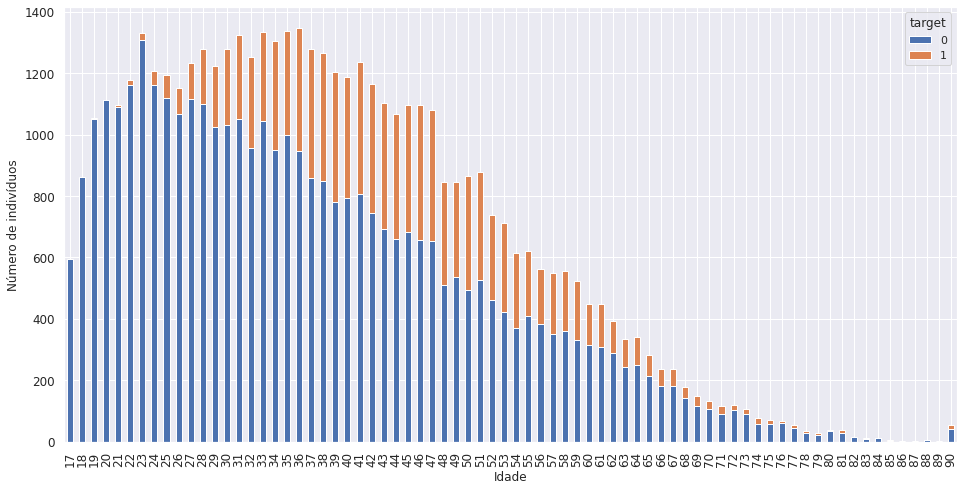

In [75]:
df_plot = df.groupby(["target", "age"]).size().reset_index().pivot(columns="target", index="age", values=0)
fig, axs = plt.subplots()
df_plot.plot.bar(stacked=True, ax=axs, figsize=(16, 8),
                 # xticks=np.arange(0, 91, 5),
                 fontsize=12,
                 # rot=1,
                 xlabel="Idade",
                 ylabel="Número de indivíduos",)
fig.savefig("./report/fig/age.pdf")

<AxesSubplot:>

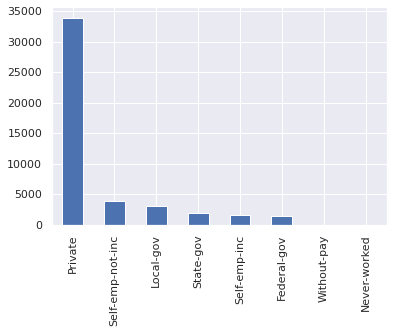

In [37]:
df["workclass"].value_counts().plot.bar()

<AxesSubplot:>

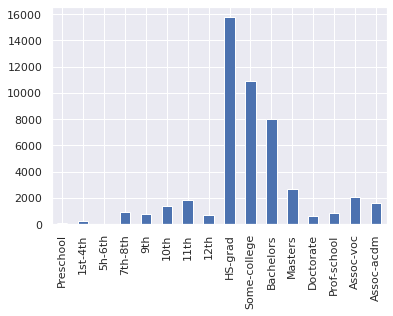

In [48]:
df["education"].value_counts(sort=False).plot.bar()

<AxesSubplot:>

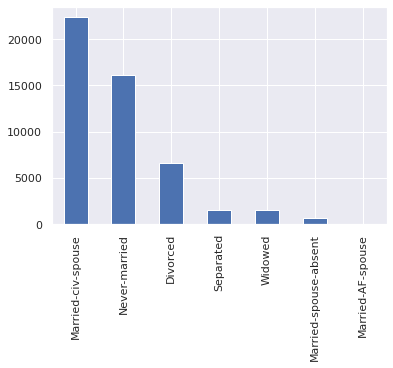

In [50]:
df["marital_status"].value_counts().plot.bar()

<AxesSubplot:>

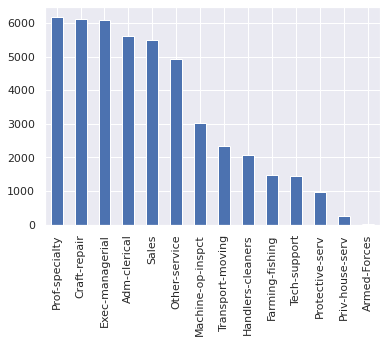

In [51]:
df["occupation"].value_counts().plot.bar()

In [36]:
# print(df.describe().drop(["hours_per_week", "target"], axis=1).to_latex())
print(df.describe()[["hours_per_week", "target"]].to_latex())

\begin{tabular}{lrr}
\toprule
{} &  hours\_per\_week &        target \\
\midrule
count &    48840.000000 &  48840.000000 \\
mean  &       40.422400 &      0.239292 \\
std   &       12.391697 &      0.426655 \\
min   &        1.000000 &      0.000000 \\
25\%   &       40.000000 &      0.000000 \\
50\%   &       40.000000 &      0.000000 \\
75\%   &       45.000000 &      0.000000 \\
max   &       99.000000 &      1.000000 \\
\bottomrule
\end{tabular}



In [22]:
df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week,target
age,1.000000,0.030917,0.077227,0.056940,0.071558,0.230362
education_num,0.030917,1.000000,0.125143,0.080974,0.143693,0.332624
capital_gain,0.077227,0.125143,1.000000,-0.031441,0.082157,0.223015
capital_loss,0.056940,0.080974,-0.031441,1.000000,0.054467,0.147551
hours_per_week,0.071558,0.143693,0.082157,0.054467,1.000000,0.227687
target,0.230362,0.332624,0.223015,0.147551,0.227687,1.000000


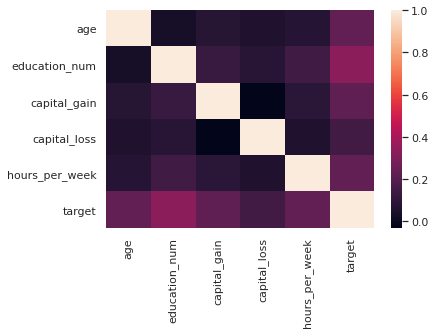

In [32]:
fig, axs = plt.subplots()
axs = sns.heatmap(df.corr())
fig.savefig("./report/fig/correlation.pdf", bbox_inches="tight")

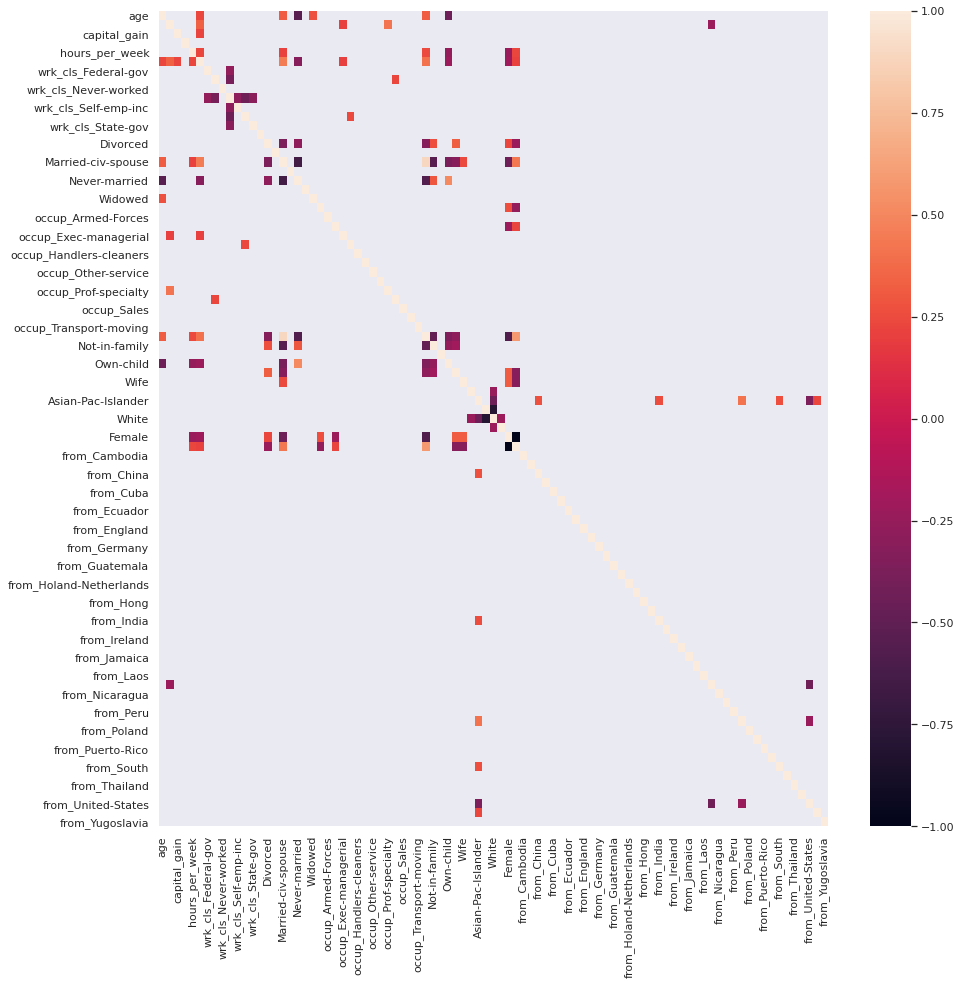

In [38]:
fig, axs = plt.subplots(figsize=(15, 15))
corr = df_dummy.corr()
corr = corr[corr.abs() > 0.2]
axs = sns.heatmap(corr)

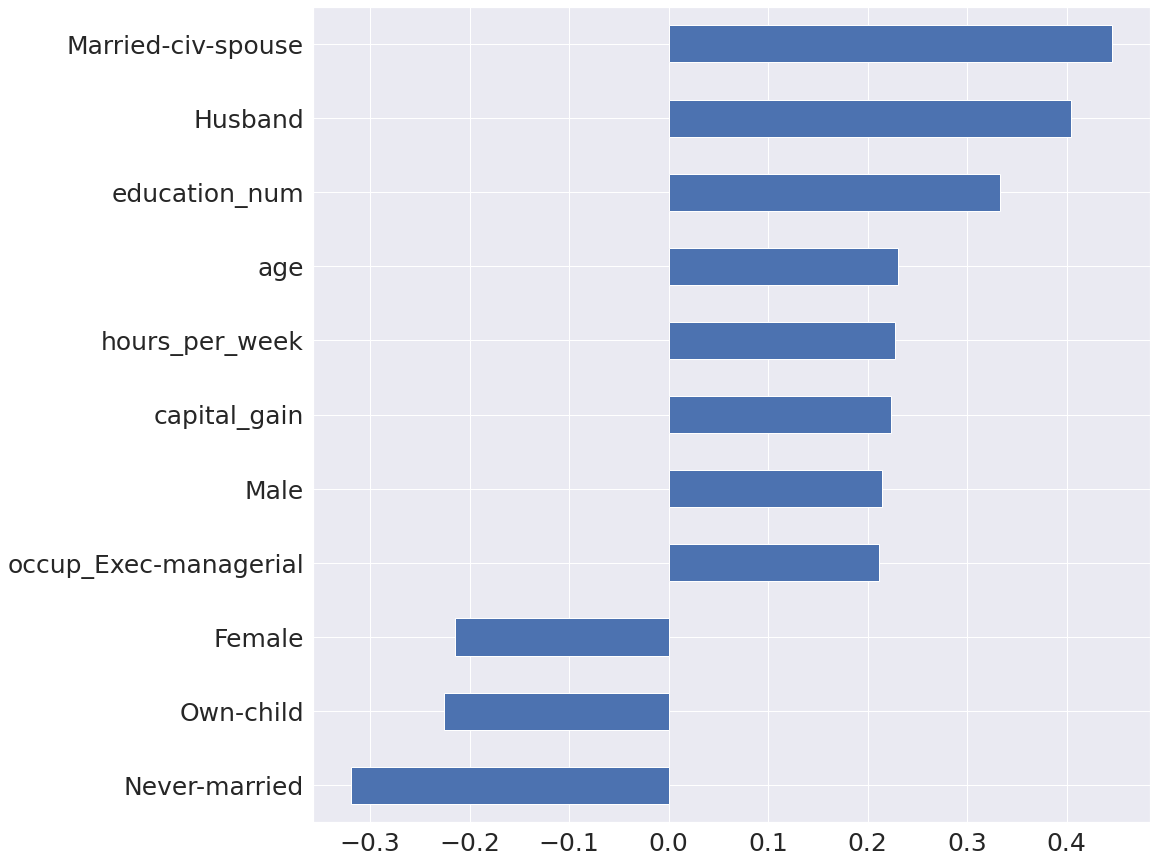

In [11]:
fig, axs = plt.subplots(figsize=(15, 15))
corr = df_dummy.corr()["target"].drop("target", axis=0).sort_values()
corr = corr[corr.abs() > 0.2]
axs = corr.plot.barh(#title="Correlação com target",
                     fontsize=25)
fig.savefig("./report/fig/corr_with_target.pdf", bbox_inches="tight")

In [39]:
for column in df_dummy_no_ctry.columns:
    print(column)

age
education
education_num
capital_gain
capital_loss
hours_per_week
native_country
target
wrk_cls_Federal-gov
wrk_cls_Local-gov
wrk_cls_Never-worked
wrk_cls_Private
wrk_cls_Self-emp-inc
wrk_cls_Self-emp-not-inc
wrk_cls_State-gov
wrk_cls_Without-pay
Divorced
Married-AF-spouse
Married-civ-spouse
Married-spouse-absent
Never-married
Separated
Widowed
occup_Adm-clerical
occup_Armed-Forces
occup_Craft-repair
occup_Exec-managerial
occup_Farming-fishing
occup_Handlers-cleaners
occup_Machine-op-inspct
occup_Other-service
occup_Priv-house-serv
occup_Prof-specialty
occup_Protective-serv
occup_Sales
occup_Tech-support
occup_Transport-moving
Husband
Not-in-family
Other-relative
Own-child
Unmarried
Wife
Amer-Indian-Eskimo
Asian-Pac-Islander
Black
White
other_race
Female
Male
